In [2]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math

In [3]:
n = 10 # Number of iterations
m = int(math.log2(64)) # Length of dim_array
dim_array = [2**i for i in range(m+1)]
MLL = np.zeros(m+1) # Define the MLL
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 62 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    
    for k in range(n):
        for i in range(1,num_samples+1): # Run over number of num_samples
            for j in range(dim): # Run over dimension
                points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
    MLL[l] = Loss_function(points,Y) # Calcualte the probability using Loss_function
    l += 1

In [4]:
Loss_function(points,Y)

-4776.350627010126

Text(0.5, 0, 'Dimension')

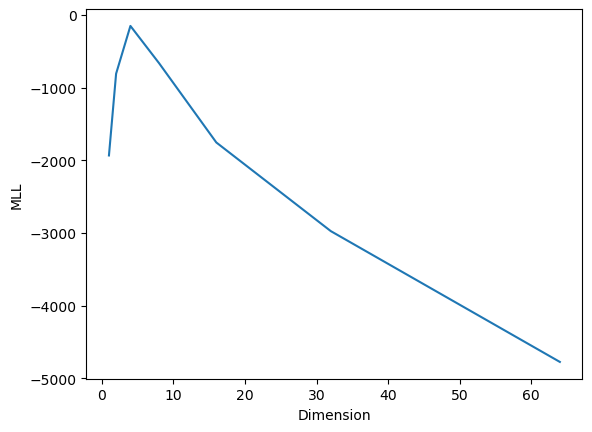

In [6]:
# Define x-axis values
x = [1, 2, 4, 8, 16, 32, 64]

plt.plot(x, MLL)
plt.ylabel('MLL')
plt.xlabel('Dimension')